In [15]:
# Carga de librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp 
%matplotlib inline
mpl.rcParams['text.usetex'] = True

> **Ejercicio 2 ✅:** A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

In [16]:
def solexacta(t):
    return np.exp(t)
def f(t,x):
    return x
def euler_explicito(f, a, b, mu, N):
    """
    Método de Euler explícito para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros((N + 1,))
    x[0] = mu
    for n in range(N):
        x[n + 1] = x[n] + h * f(t[n], x[n])
    return t, x
def euler_mejorado(f, a, b, mu, N):
    """
    Método de Euler mejorado para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros((N + 1,))
    x[0] = mu
    for n in range(N):
        x[n + 1] = x[n] + h * f(t[n]+(h/2), x[n]+(h/2)*f(t[n],x[n]))
    return t, x
def euler_modificado(f, a, b, mu, N):
    """
    Método de Euler explícito para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    x = np.zeros((N + 1,))
    x[0] = mu
    for n in range(N):
        x[n + 1] = x[n] + (h/2) * (f(t[n], x[n]) + f(t[n+1],x[n]+h*f(t[n],x[n])))
    return t, x
a=0
b=1
mu=1
N=10
def solexacta(t):
    return np.exp(t)
def f(t,x):
    return x
## pruebo los metodos para la funcion que tiene como solucion e^t
print("-------Comprobacion resultados--------------")
print("-------Euler explicito--------------")
t_values,x_values=euler_explicito(f,a,b,mu,N)
print(x_values)
print("-------Euler mejorado--------------")
t_values,x_values=euler_mejorado(f,a,b,mu,N)
print(x_values)
print("-------Euler modificado (Heun)--------------")
t_values,x_values=euler_modificado(f,a,b,mu,N)
print(x_values)
print("---------Resultados exactos--------")
print(solexacta(t_values))

-------Comprobacion resultados--------------
-------Euler explicito--------------
[1.         1.1        1.21       1.331      1.4641     1.61051
 1.771561   1.9487171  2.14358881 2.35794769 2.59374246]
-------Euler mejorado--------------
[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]
-------Euler modificado (Heun)--------------
[1.         1.105      1.221025   1.34923262 1.49090205 1.64744677
 1.82042868 2.01157369 2.22278892 2.45618176 2.71408085]
---------Resultados exactos--------
[1.         1.10517092 1.22140276 1.34985881 1.4918247  1.64872127
 1.8221188  2.01375271 2.22554093 2.45960311 2.71828183]


> **Ejercicio 3** A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.

In [17]:
def taylor_3(f, a, b, mu, N):
    """
    Método de Taylor de orden 3 para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    h = (b - a) / N
    t_values = np.linspace(a, b, N + 1)
    x_values = np.zeros(N + 1)
    x_values[0] = mu
    t, z = sp.symbols('t z')
    F1 = lambda t,z: f(t,z)
    F2 = lambda t,z: sp.diff(f(t,z),t) + sp.diff(f(t,z),z)*f(t,z)
    F3 = lambda t,z: sp.diff(F2(t, z), t) + sp.diff(F2(t, z), z) * f(t, z)

    for n in range(N):
        x_values[n + 1] = np.float64(x_values[n] + h * F1(t_values[n], x_values[n]) + \
                                     (h**2 / 2) * F2(t,z).subs({t: t_values[n], z: x_values[n]}) 
                                     + (h**3/6)*F3(t,z).subs({t: t_values[n], z: x_values[n]}))
    return t_values, x_values

# lo probamos con la funcion exponencial 
a=0
b=1
mu=1
N=10
def solexacta(t):
    return np.exp(t)
def f(t,x):
    return x
t_values ,x_values=taylor_3(f,a,b,mu,N)
print("--------Taylor orden 3------------")
print(x_values)
print("--------Valor exacto------------")
print(solexacta(t_values))

--------Taylor orden 3------------
[1.         1.10516667 1.22139336 1.34984323 1.49180174 1.64868956
 1.82207674 2.01369848 2.22547244 2.45951796 2.71817726]
--------Valor exacto------------
[1.         1.10517092 1.22140276 1.34985881 1.4918247  1.64872127
 1.8221188  2.01375271 2.22554093 2.45960311 2.71828183]


> **Ejercicio  4 ✅:** Programe el método de Runge-Kutta de 4 evaluaciones y grafique la sucesión de aproximaciones y calcule el error cuadrático medio y el máximo error absoluto con respecto a la solución exacta.



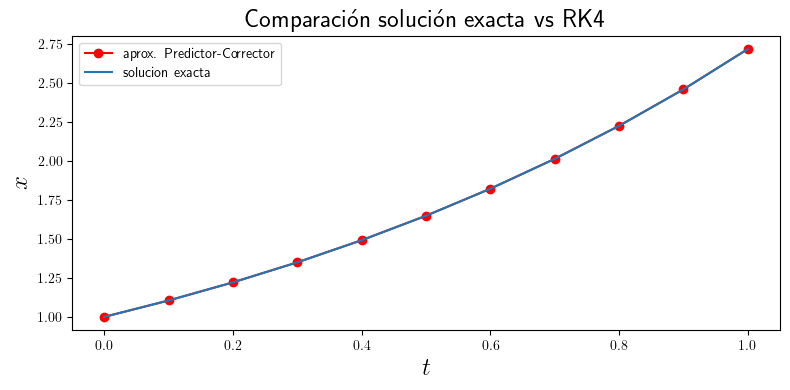

In [18]:
def solexacta(t):
    return np.exp(t)
def f(t,x):
    return x

def RK4(f, a, b, mu, N):
    """
    Método de Runge-Kutta de orden 4 para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    
    h = (b - a) / N
    t_values = np.linspace(a, b, N + 1)
    x_values = np.zeros(N + 1)
    x_values[0] = mu
    for n in range(N):
        K1 = f(t_values[n], x_values[n])
        K2 = f(t_values[n] + h/2, x_values[n] + (h/2) * K1)
        K3 =f(t_values[n] + h/2, x_values[n] + (h/2) * K2)
        K4 =f(t_values[n] + h, x_values[n] + h * K3)
        x_values[n + 1] = x_values[n] + (h/6) * (K1 + 2*K2 + 2*K3 + K4)
    return t_values, x_values
a=0
b=1
N=10    
mu=solexacta(a)

t_values ,x_values =RK4(f,a,b,mu,N)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values, 'ro-',label = r"aprox. Predictor-Corrector")
ax.plot(t_values, solexacta(t_values),label="solucion exacta")
ax.set_title(r"Comparación solución exacta vs RK4", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig
graf_Eulerexpl = fig


In [19]:
print("------------error cuadratico medio-------------")
ECM_rk4 = ((x_values - solexacta(t_values))**2).mean()
print(ECM_rk4)
print("------------maximo error absoluto-------------")
MEA_rk4  = np.max(np.abs(x_values - solexacta(t_values)))
print(MEA_rk4)


------------error cuadratico medio-------------
1.0643544715729965e-12
------------maximo error absoluto-------------
2.0843238792700447e-06


> **Ejercicio 5 (Ejercicio final de las diapositivas) ✅:** Se pretende aproximar la solución del PVI:
> $$
> \left\{\begin{array}{rcl}
> x'(t) &=& \dfrac{t-x(t)} 2 \\
> x(0) &=& 1
> \end{array}\right..
> $$
> en $[0,3]$
> 1. Usa el método de Runge-Kutta de 2 evaluaciones con $\alpha= 3/4$ y $\beta=2/3$ para $h = 1$, $h = 1/2$, $h = 1/4$ y $h = 1/8$ y compara los resultados obtenidos.
> 2. Repite el apartado anterior usando Runge-Kutta clásico.
> 
> Nota: La solución exacta es $x(t) = 3 e^{-t/2} + t -2$.

In [20]:
def RK2(f, a, b, mu, N, alpha=0.5, beta=1):
    """
    Método de Runge-Kutta de orden 2 para resolver la ecuación diferencial
    x' = f(t,x) con condición inicial x(a) = mu en el intervalo [a,b]
    con N pasos.
    """
    
    h = (b - a) / N
    t_values = np.linspace(a, b, N + 1)
    x_values = np.zeros(N + 1)
    x_values[0] = mu
    for n in range(N):
        K1 = f(t_values[n], x_values[n])
        K2 = f(t_values[n] + beta * h, x_values[n] + beta * h * K1)
        x_values[n + 1] = x_values[n] + h * ((1-alpha)*K1 + alpha*K2)
    return t_values, x_values

def f(t,x):
    return (t-x)/2
def fsol(t):
    return 3*np.exp(-t/2) + t-2
a=0
b=3
mu=1
alpha=3/4
beta=2/3


print("-----------RK2 h=1 => N=3---------------") 
t_n, x_n = RK2(f,a,b,mu,3,alpha,beta)
print(x_n)
print("-----------RK2 h=1/2 => N=6---------------") 
t_n, x_n = RK2(f,a,b,mu,6,alpha,beta)
print(x_n)
print("-----------RK2 h=1/4 => N=12---------------")
t_n, x_n = RK2(f,a,b,mu,12,alpha,beta)
print(x_n) 
print("-----------RK2 h=1/8 => N=24---------------")
t_n, x_n = RK2(f,a,b,mu,24,alpha,beta)
print(x_n) 
print("-----------RK4 h=1 => N=3---------------")
t_n, x_n = RK4(f,a,b,mu,3)
print(x_n) 
print("-----------RK4 h=1/2 => N=6---------------")
t_n, x_n = RK4(f,a,b,mu,6)
print(x_n)  
print("-----------RK4 h=1/4 => N=12---------------") 
t_n, x_n = RK4(f,a,b,mu,12)
print(x_n) 
print("-----------RK4 h=1/8 => N=24---------------") 
t_n, x_n = RK4(f,a,b,mu,24)
print(x_n) 

-----------RK2 h=1 => N=3---------------
[1.         0.875      1.171875   1.73242188]
-----------RK2 h=1/2 => N=6---------------
[1.         0.84375    0.83105469 0.93051147 1.11758709 1.37311491
 1.68212103]
-----------RK2 h=1/4 => N=12---------------
[1.         0.8984375  0.83807373 0.81408072 0.82219626 0.85865763
 0.92014307 1.00372005 1.10679973 1.22709664 1.36259313 1.51150799
 1.67226878]
-----------RK2 h=1/8 => N=24---------------
[1.         0.94335938 0.89771652 0.86240556 0.83680093 0.82031493
 0.81239547 0.81252387 0.82021286 0.83500466 0.85646922 0.88420253
 0.91782503 0.95698016 1.00133292 1.05056862 1.10439162 1.16252416
 1.22470531 1.29068995 1.36024778 1.43316247 1.50923076 1.58826171
 1.67007594]
-----------RK4 h=1 => N=3---------------
[1.         0.8203125  1.10451253 1.67018599]
-----------RK4 h=1/2 => N=6---------------
[1.         0.83642578 0.81962848 0.9171423  1.1036826  1.35955749
 1.66943076]
-----------RK4 h=1/4 => N=12---------------
[1.         0.897491

> **Ejercicio 7 ✅:** Implemente un método MML Predictor-Corrector combinando un predictor AB de 5 pasos con un corrector AM de 4, y aplicando una sólo corrección en cada iteración:
> $$
> P: \qquad x_{n+5}^{(0)} = x_{n+4} + \frac{h}{720} (1901 f_{n+4} -2774 f_{n+3} +2616 f_{n+2} - 1274 f_{n+1} + 251 f_n)
> $$
> $$
> C^1: \qquad  x_{n+5} = x_{n+4} + \frac{h}{720} (251 f(t_{n+5},x_{n+5}^{(0)}) + 646 f_{n+4} -264 f_{n+3} +106 f_{n+2} - 19 f_{n+1} )
> $$

----Valores predictor corrector-----
[1.         1.10517092 1.22140276 1.34985881 1.4918247  1.64872128
 1.82211883 2.01375275 2.22554099 2.4596032  2.71828194]


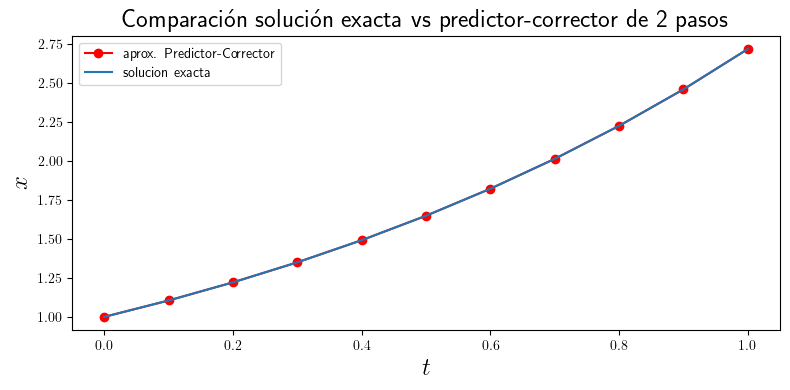

In [21]:
def solexacta(t):
    return np.exp(t)
def f(t,x):
    return x
def predictor_corrector_AB5_AM4(f, a, b, x0, x1,x2,x3,x4, N):
    """
    Método predictor-corrector para resolver la ecuación diferencial
    x' = f(t,x) con condiciones iniciales x0, x1, x2 en el intervalo [a,b]
    con N pasos.
    Utilizamos el método AM de 5 pasos  para la predicción y uno AB de 4 pasos  para la corrección.
    """
    h = (b - a) / N
    x_predict = np.zeros(N + 1)
    t_values = np.linspace(a, b, N + 1)
    x_values = np.zeros(N + 1)
    x_values[0] = x_predict[0]=x0
    x_values[1] = x_predict[1]=x1
    x_values[2] = x_predict[2]=x2
    x_values[3] = x_predict[3]=x3
    x_values[4] = x_predict[4]=x4
    
    # Predicción, usaremos la fórmula abierta de 4 pasos:
    for n in range(N-4):
        
        # Predicción, usaremos el método de Adam-Bashforth de orden 2:
        x_values[n + 5] = x_values[n+4] + (h/720)*(1901*f(t_values[n+4],x_values[n+4])-2774*f(t_values[n+3],x_values[n+3])+2616*f(t_values[n+2],x_values[n+2])-1274*f(t_values[n+1],x_values[n+1])+251*f(t_values[n],x_values[n]))

        # Corrección, usaremos la regla de Simpson:
        x_values[n + 5] = x_values[n+4] + (h/720)*(251*f(t_values[n+5],x_values[n+5])+646*f(t_values[n+4],x_values[n+4])-264*f(t_values[n+3],x_values[n+3])+106*f(t_values[n+2],x_values[n+2])-19*f(t_values[n+1],x_values[n+1]))

    return t_values, x_values

#pruebo la funcion 
N=10
b=1
a=0
h=(b-a)/N
x0=solexacta(a)
x1=solexacta(a+h)
x2=solexacta(a+2*h)
x3=solexacta(a+3*h)
x4=solexacta(a+4*h)
tvalues,xvalues = predictor_corrector_AB5_AM4(f,a,b,x0,x1,x2,x3,x4,N)
print("----Valores predictor corrector-----")
print(xvalues)
# Dibujamos y comparamos con la solución exacta
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(tvalues, xvalues, 'ro-',label = r"aprox. Predictor-Corrector")
ax.plot(t_values, solexacta(t_values),label="solucion exacta")
ax.set_title(r"Comparación solución exacta vs predictor-corrector de 2 pasos", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

> **Ejercicio 9 ✅:** Dado el siguiente PVI definido para $t\in[0,1]$:
> $$\left\{\begin{array}{rcl}
> x'(t) &=& \cos(x(t)) + t^2 \\
> x(0) &=& 1
> \end{array}\right.
> $$
> a) Intente encontrar la solución exacta del PVI.
>
> b) Aproxime numéricamente el PVI utilizando los métodos que considere y represente gráficamente las diferentes aproximaciones en el intervalo $[0,1]$.
>
> c) Para el método que observe que devuelve mejores resultados, estudie su sensibilidad a distintos valores de $N$ (por tanto de $h$).

Para el primer apartado uso solve_ivp para encontrar una solucion exacta

In [22]:
def f(t,x):
    return np.cos(x)+t**2
N=10
a= 0
b=1
x0=1

## uso solve_ivp para encontrar una solucion exacta y comparar del modulo scipy.integrate 
t_values = np.linspace(a,b, 100)
solexacta = solve_ivp(f, (a,b), [x0], t_eval=t_values,method='RK45')
print(solexacta.y)



[[1.         1.00543479 1.01082547 1.01617432 1.0214836  1.02675554
  1.03199239 1.03719634 1.0423696  1.04751434 1.05263274 1.05772695
  1.06279935 1.06785254 1.07288857 1.07790944 1.08291715 1.08791367
  1.09290099 1.09788104 1.10285578 1.10782713 1.11279701 1.11776731
  1.12273993 1.12771673 1.13269959 1.13769034 1.14269083 1.14770286
  1.15272825 1.15776879 1.16282626 1.16790243 1.17299905 1.17811785
  1.18326057 1.18842892 1.19362459 1.19884927 1.20410464 1.20939234
  1.21471404 1.22007134 1.22546589 1.23089927 1.23637309 1.24188891
  1.24744831 1.25305283 1.25870401 1.26440337 1.27015243 1.27595268
  1.2818056  1.28771267 1.29367533 1.29969504 1.30577322 1.31191129
  1.31811064 1.32437268 1.33069877 1.33709028 1.34354855 1.35007491
  1.3566707  1.36333722 1.37007576 1.37688761 1.38377403 1.39073627
  1.39777558 1.40489318 1.41209029 1.4193681  1.42672781 1.43417059
  1.44169759 1.44930996 1.45700884 1.46479535 1.47267058 1.48063564
  1.48869159 1.49683952 1.50508046 1.51341546 1.

Para el apartado b voy a usar los metodos de euler mejorado,  RK2 , RK4 y el predictor corrector del ejercicio anterior

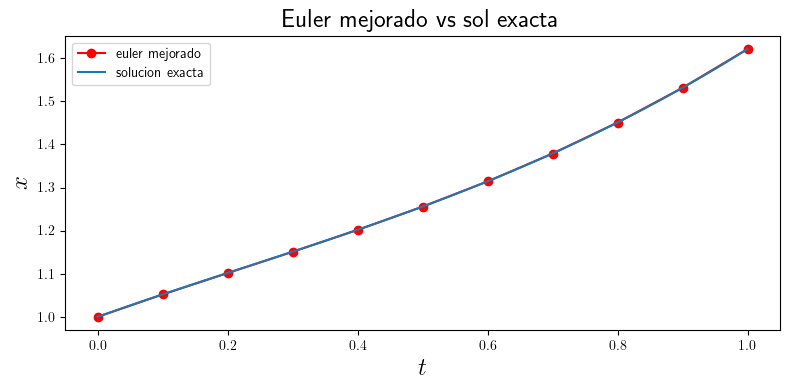

In [23]:
# Dibujamos y comparamos con la solución exacta
t_values,x_values =euler_mejorado(f,a,b,mu,10)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values, 'ro-',label = r"euler mejorado")
ax.plot(solexacta.t, solexacta.y[0],label="solucion exacta")
ax.set_title(r"Euler mejorado vs sol exacta", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

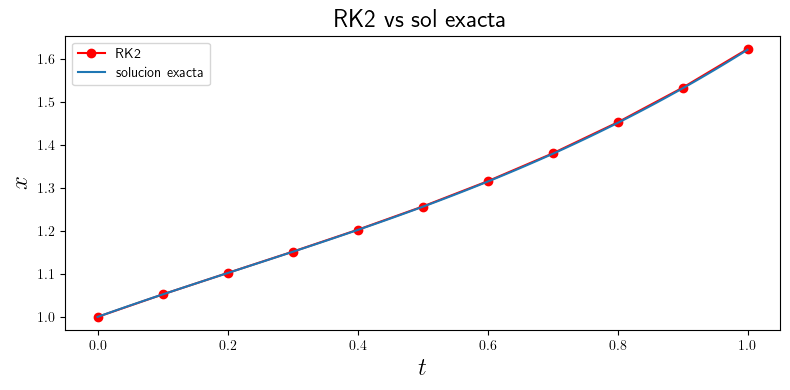

In [24]:
# Dibujamos y comparamos con la solución exacta
t_values,x_values =RK2(f,a,b,mu,10)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values, 'ro-',label = r"RK2")
ax.plot(solexacta.t, solexacta.y[0],label="solucion exacta")
ax.set_title(r"RK2 vs sol exacta", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

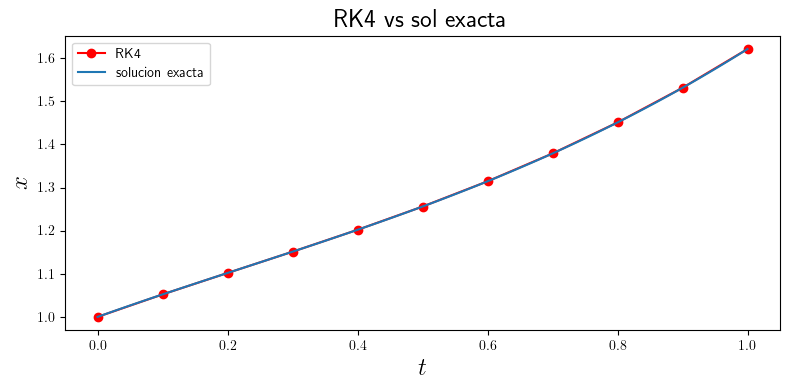

In [25]:
# Dibujamos y comparamos con la solución exacta
t_values,x_values =RK4(f,a,b,mu,10)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values, 'ro-',label = r"RK4")
ax.plot(solexacta.t, solexacta.y[0],label="solucion exacta")
ax.set_title(r"RK4 vs sol exacta", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

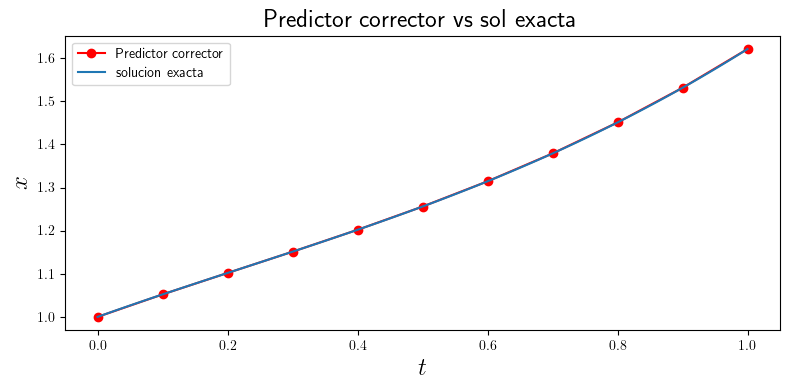

In [26]:
# Dibujamos y comparamos con la solución exacta
# como valores iniciales uso los aproximados por la solucion exacta
tvalues,xvalues = predictor_corrector_AB5_AM4(f,a,b,solexacta.y[0][0],solexacta.y[0][1],solexacta.y[0][2],solexacta.y[0][3],solexacta.y[0][4],N)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t_values, x_values, 'ro-',label = r"Predictor corrector")
ax.plot(solexacta.t, solexacta.y[0],label="solucion exacta")
ax.set_title(r"Predictor corrector vs sol exacta", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig

Para el apartado C usaremos el método de RK4, ya que podemos observar que todos se comportan muy bien con la solución exacta. Hay que tener en cuenta que la solución exacta del PVI se ha encontrado también con una función que usa una aproximación numérica, por lo que puede no ser idéntica a la función original, pero teniendo en cuenta que la aproximación que hace esta función es muy precisa, vemos que todos los métodos se comportan de una forma correcta y parecida.

Para ver como se comporta con distintos valores de N graficaremos la funcion con valores para N=3,10,20,30

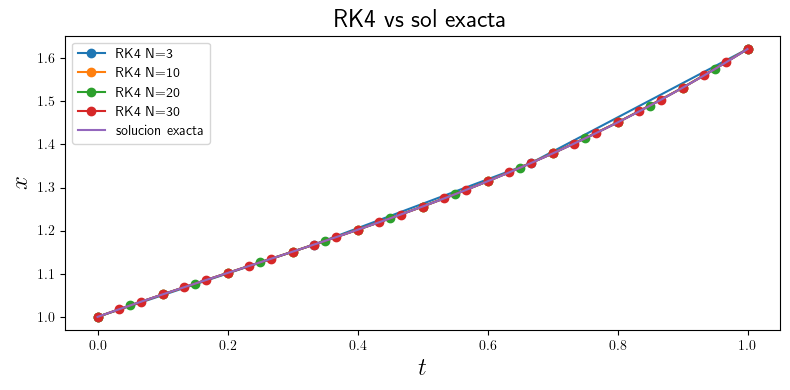

In [27]:
n=[3,10,20,30]
abstvalues=[]
absxvalues=[]
for i in range(len(n)):
    t_values ,x_values =RK4(f,a,b,mu,n[i])
    abstvalues.append(t_values)
    absxvalues.append(x_values)

# Dibujamos y comparamos con la solución exacta

fig, ax = plt.subplots(figsize=(8, 4))
for i in range(len(abstvalues)):
    ax.plot(abstvalues[i],absxvalues[i], 'o-',label = f"RK4 N={n[i]}")


ax.plot(solexacta.t, solexacta.y[0],label="solucion exacta")
ax.set_title(r"RK4 vs sol exacta", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig


Podemos observar que el metodo aproxima mejor la solucion cuanto mas alto sea el valor de N y peor cuando N sea mas pequenio , esto se debe a que la cantidad h con la que incrementamos t_n decrementa cuanto mas grande es N y por tanto podemos dar mas pasos dentro del intervalo .

podemos repetir el mismo procedimiento facilmente para RK2 con el mismo codigo y vemos como a RK2 le influye mucho mas la variacion de N sobre todo con un valor de N chico

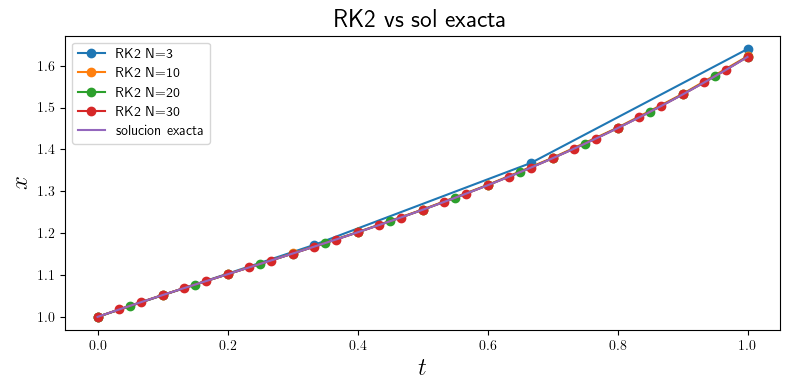

In [28]:
n=[3,10,20,30]
abstvalues=[]
absxvalues=[]
for i in range(len(n)):
    t_values ,x_values =RK2(f,a,b,mu,n[i])
    abstvalues.append(t_values)
    absxvalues.append(x_values)

# Dibujamos y comparamos con la solución exacta

fig, ax = plt.subplots(figsize=(8, 4))
for i in range(len(abstvalues)):
    ax.plot(abstvalues[i],absxvalues[i], 'o-',label = f"RK2 N={n[i]}")


ax.plot(solexacta.t, solexacta.y[0],label="solucion exacta")
ax.set_title(r"RK2 vs sol exacta", fontsize=18)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x$", fontsize=18)
ax.legend()
fig.tight_layout()
graf_Eulerexpl = fig